In [253]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scienceplots
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec

plt.style.use(['science','no-latex', 'muted'])
rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 16})

In [248]:
check_col = lambda s: s.endswith("MIN") or s.endswith("MAX")

In [288]:
def rename_col(col):
    out = ""
    if "etl" in col:
        out = "easy{\\text -}to{\\text -}learn"
    elif "amb" in col:
        out = "ambiguous"
    elif "htl" in col:
        out = "hard-to-learn"
    elif "full" in col:
        return "no \\; curriculum"
    
    if "chia" in col:
        out = f"{out} \\; (CHIA)"
    elif "inv_ppl" in col:
        out = f"{out} \\; (Inv \\; PPL)"
    if "bleu" in col:
        out = f"{out} \\; (BLEU)"
        
    return out

In [289]:
def linestyle_getter(col_name):
    styles = ['-', ':', '--', '-.']
    if "CHIA" in col_name:
        return styles[0]
    elif "Inv \\; PPL" in col_name:
        return styles[1]
    elif "BLEU" in col_name:
        return styles[2]
    elif col_name == "no \\; curriculum":
        return styles[3]

In [290]:
def curriculum_plot(csv_name):
    df = pd.read_csv(csv_name)
    columns = df.columns
    columns = [col for col in columns if check_col(col)]
    df = df.drop(columns, axis=1)

    steps = df["Step"].tolist()
    df = df.drop(["Step"], axis=1)
    
    new_cols = {col:rename_col(col) for col in df.columns}
    df = df.rename(columns=new_cols)

    fig = plt.figure(figsize=(13, 5))
    gs = GridSpec(1, 5, figure=fig)

    
    # Plot the data on the main subplot
    ax_main = fig.add_subplot(gs[0, :4])
    
    for col in df.columns:
        acc = df[col].tolist()
        ax_main.plot(steps, acc, label="$\it{"+col+"}$", linewidth=1.5, linestyle=linestyle_getter(col))  # Plot some data on the axes.
        
    handles, labels = ax_main.get_legend_handles_labels()

    # Create an empty subplot for the legend
    ax_legend = fig.add_subplot(gs[0, 4:])

    # Add the legend to the empty subplot
    ax_legend.legend(handles, labels, loc='center', fontsize=13.5)
    ax_legend.axis('off')

    # Adjust the spacing between the subplots
    gs.update(wspace=0.6)

    ax_main.set_xlabel('Steps')  # Add an x-label to the axes.
    ax_main.set_ylabel('Test Accuracy')  # Add a y-label to the axes.
    plt.savefig(csv_name.split(".")[0] + "_plot.pdf", format="pdf", bbox_inches='tight')

In [291]:
curriculum_plot("cfq_curr.csv")

ValueError: 
\it{easy{\text -}to{\text -}learn \; (CHIA)}
         ^
Unknown symbol: \text, found '\'  (at char 9), (line:1, col:10)

Error in callback <function _draw_all_if_interactive at 0x127366b90> (for post_execute):


ValueError: 
\it{easy{\text -}to{\text -}learn \; (CHIA)}
         ^
Unknown symbol: \text, found '\'  (at char 9), (line:1, col:10)

ValueError: 
\it{easy{\text -}to{\text -}learn \; (CHIA)}
         ^
Unknown symbol: \text, found '\'  (at char 9), (line:1, col:10)

<Figure size 7800x3000 with 2 Axes>

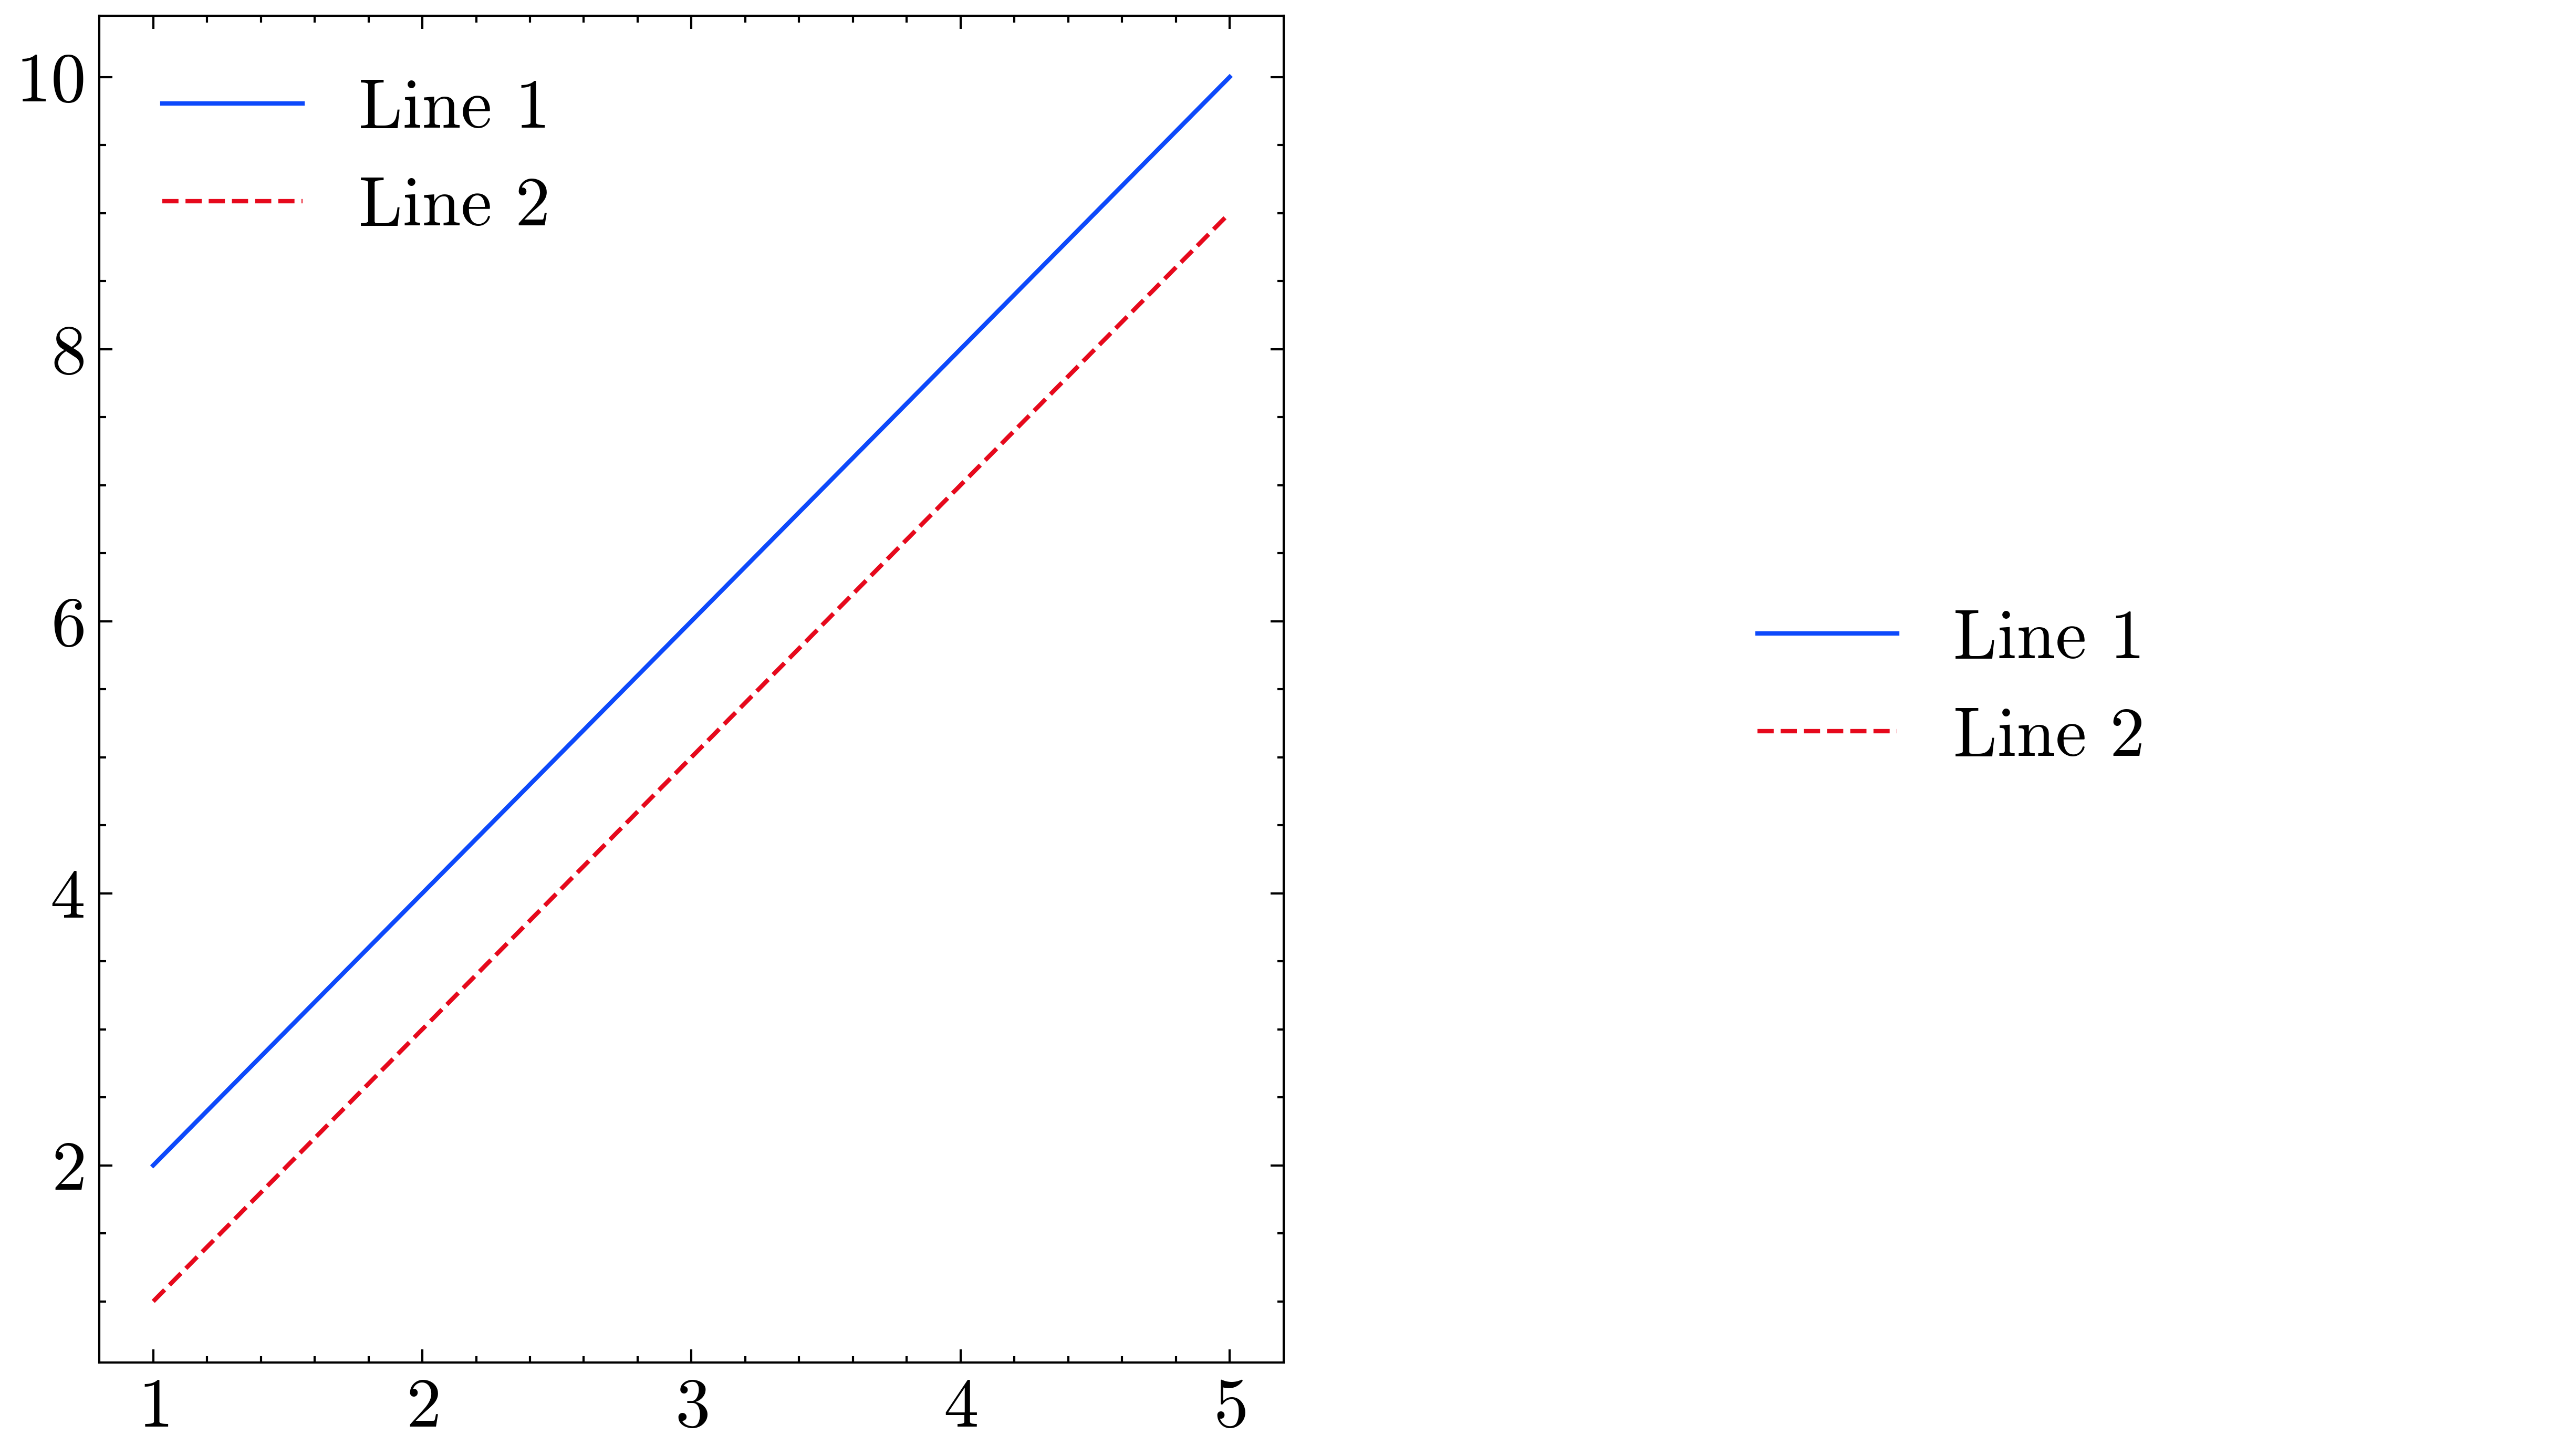

In [236]:
import matplotlib.pyplot as plt

# Create some data for Line 1
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]

# Create some data for Line 2
x2 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the data on the main subplot
line1, = ax[0].plot(x1, y1, label='Line 1')
line2, = ax[0].plot(x2, y2, label='Line 2')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend()

# Create an empty subplot for the legend
ax[1].axis('off')

# Add the legend to the empty subplot
ax[1].legend(handles, labels, loc='center')

# Adjust the layout to make space for the legend
fig.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


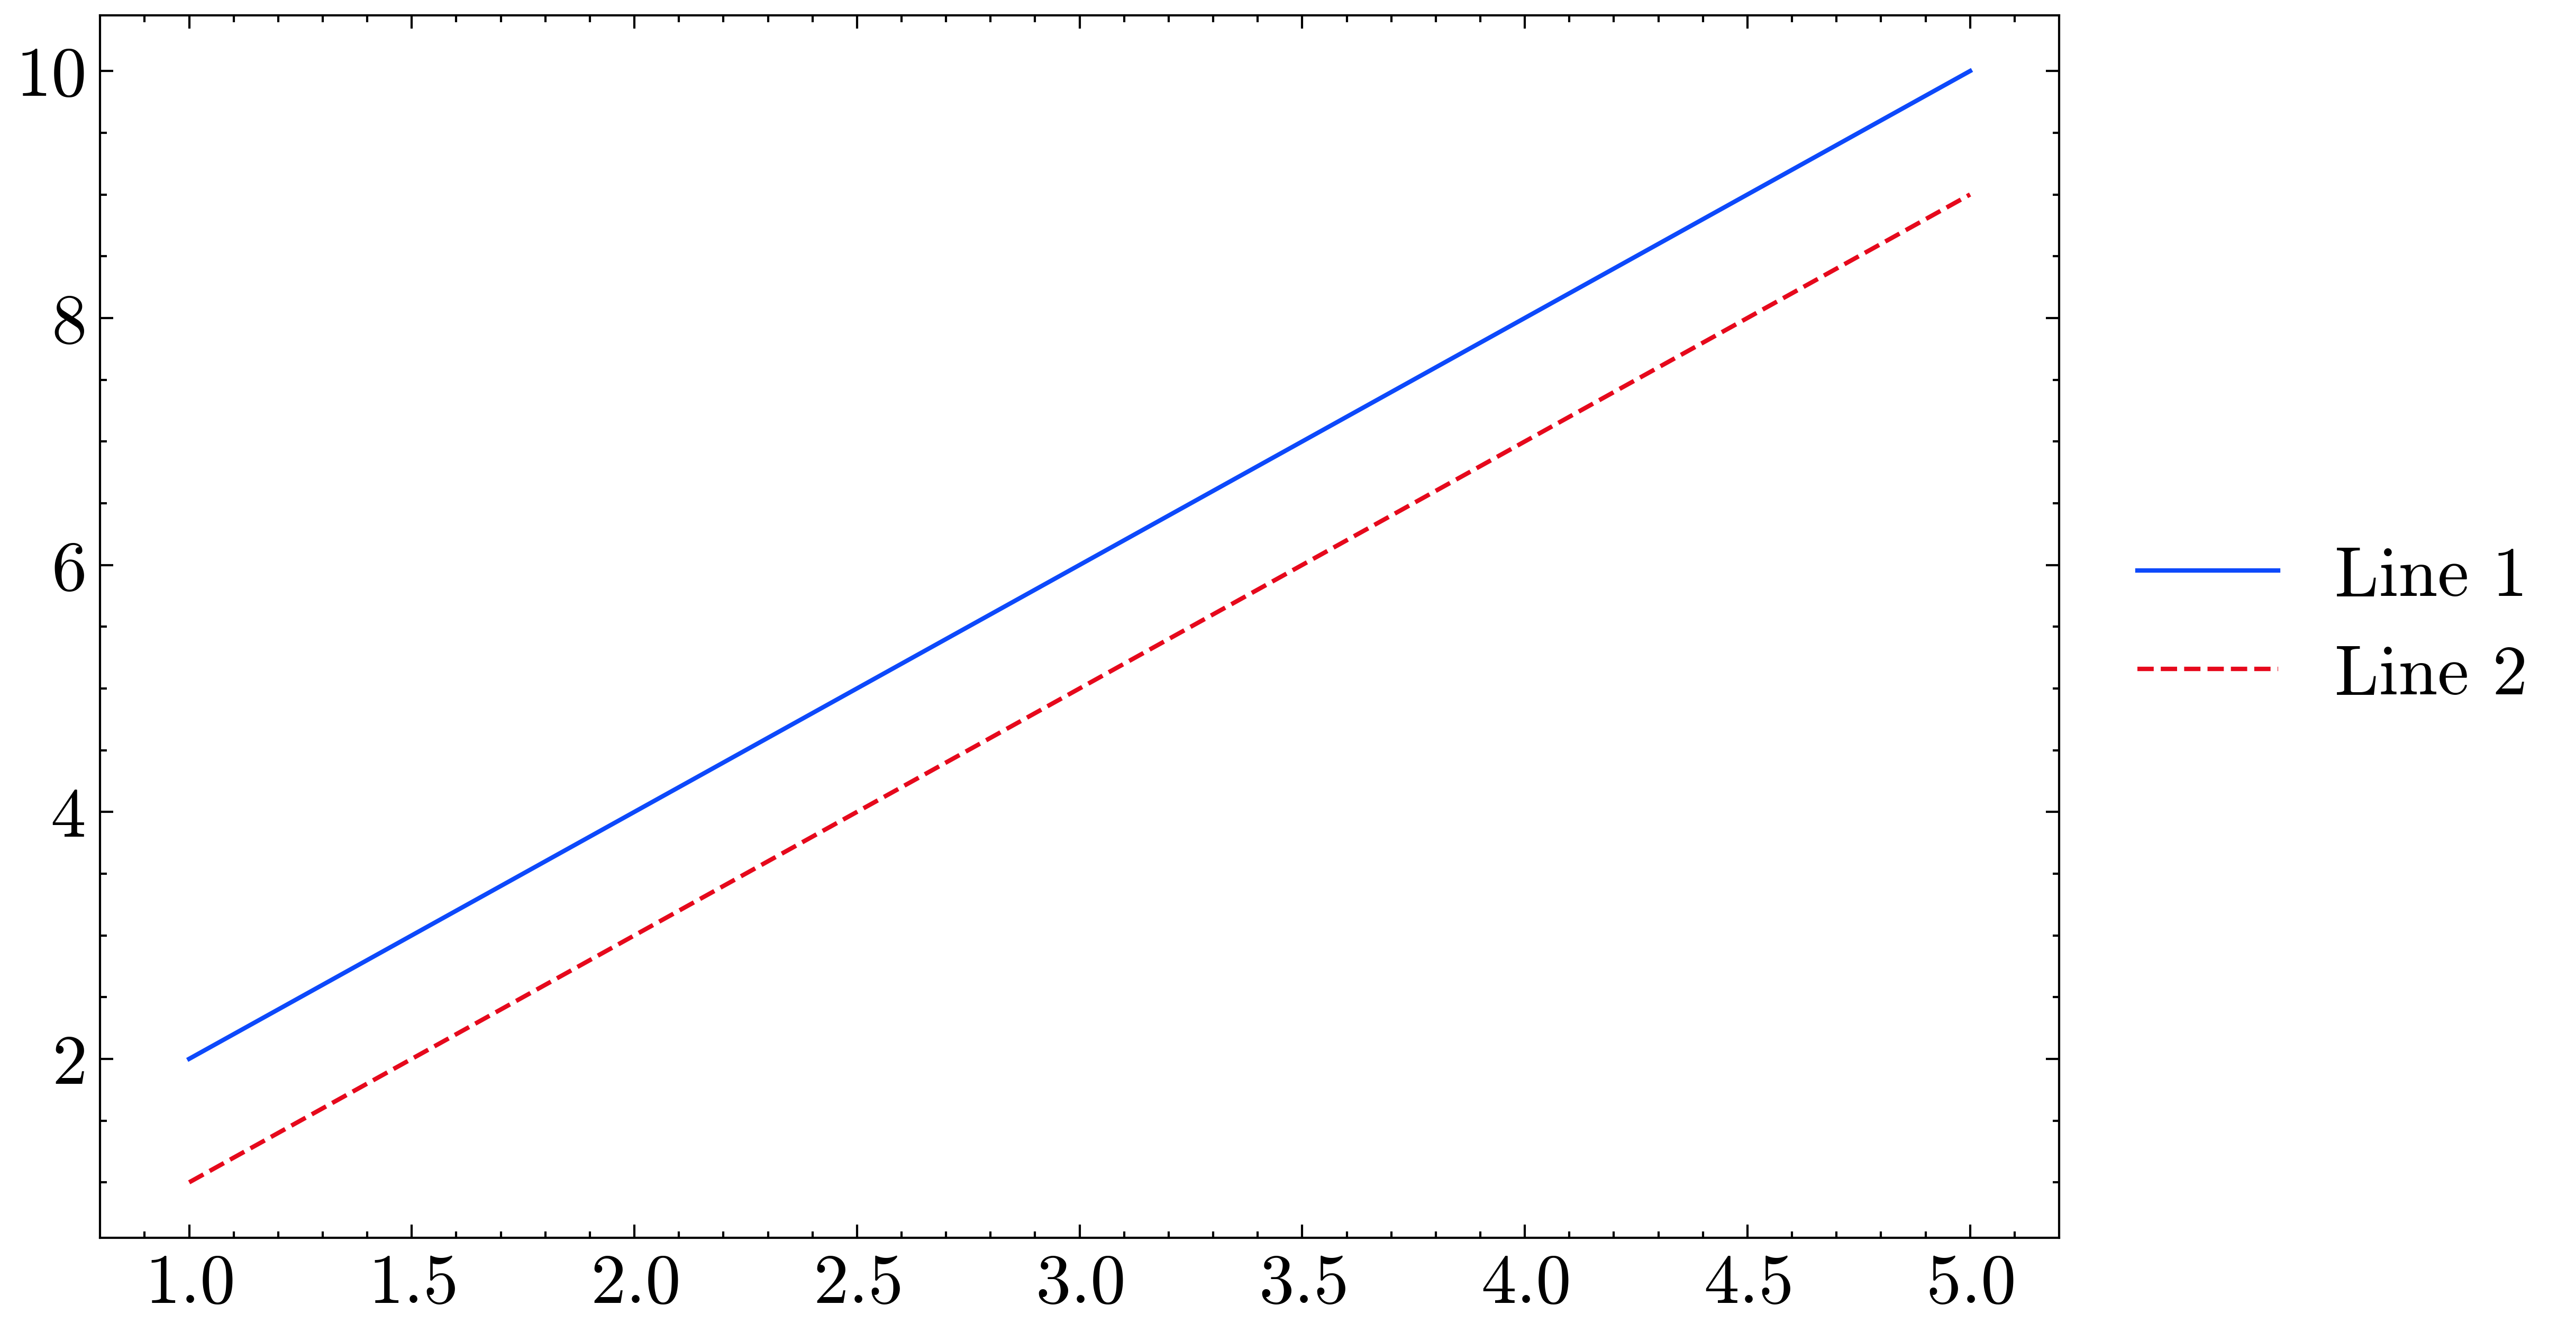

In [237]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create some data for Line 1
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]

# Create some data for Line 2
x2 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]

# Create subplots
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 5, figure=fig)

# Plot the data on the main subplot
ax_main = fig.add_subplot(gs[0, :4])
line1, = ax_main.plot(x1, y1, label='Line 1')
line2, = ax_main.plot(x2, y2, label='Line 2')
handles, labels = ax_main.get_legend_handles_labels()
ax_main.legend([])  # Turn off the legend on the main plot

# Create an empty subplot for the legend
ax_legend = fig.add_subplot(gs[0, 4:])

# Add the legend to the empty subplot
ax_legend.legend(handles, labels, loc='center')
ax_legend.axis('off')

# Adjust the spacing between the subplots
gs.update(wspace=0.1)

# Show the plot
plt.show()